In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay

from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("creditcard.csv")

print("--- Dataset Information ---")
print(df.info())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19999 non-null  int64  
 1   V1      19999 non-null  float64
 2   V2      19999 non-null  float64
 3   V3      19999 non-null  float64
 4   V4      19999 non-null  float64
 5   V5      19999 non-null  float64
 6   V6      19999 non-null  float64
 7   V7      19999 non-null  float64
 8   V8      19999 non-null  float64
 9   V9      19999 non-null  float64
 10  V10     19999 non-null  float64
 11  V11     19999 non-null  float64
 12  V12     19999 non-null  float64
 13  V13     19999 non-null  float64
 14  V14     19999 non-null  float64
 15  V15     19999 non-null  float64
 16  V16     19999 non-null  float64
 17  V17     19999 non-null  float64
 18  V18     19999 non-null  float64
 19  V19     19999 non-null  float64
 20  V20     19999 non-null  float64
 21  V21    

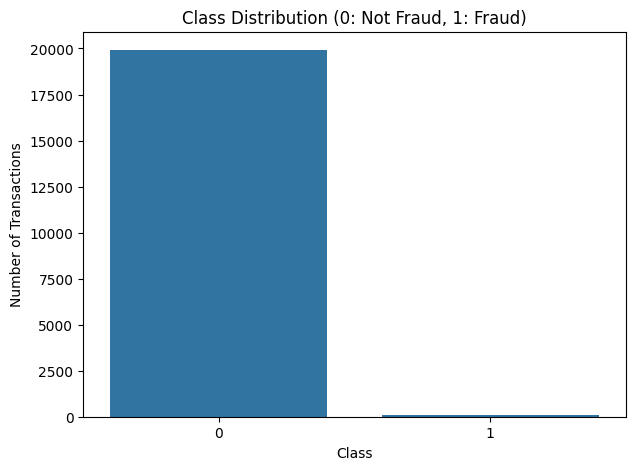

In [3]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()


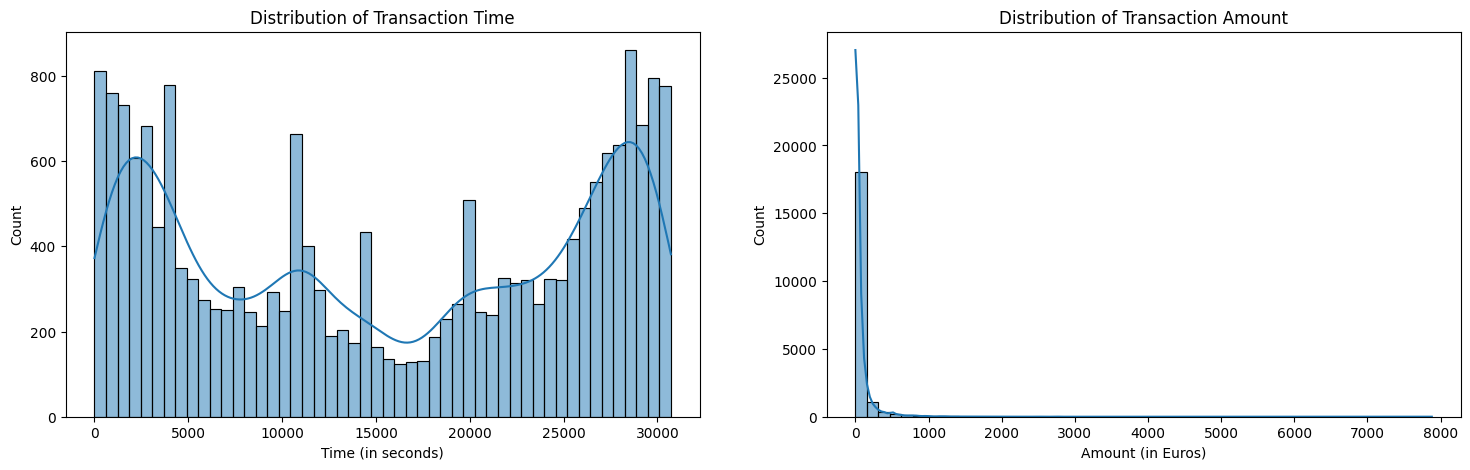

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(df['Time'], bins=50, kde=True, ax=ax1)
ax1.set_title('Distribution of Transaction Time')
ax1.set_xlabel('Time (in seconds)')

sns.histplot(df['Amount'], bins=50, kde=True, ax=ax2)
ax2.set_title('Distribution of Transaction Amount')
ax2.set_xlabel('Amount (in Euros)')
plt.show()


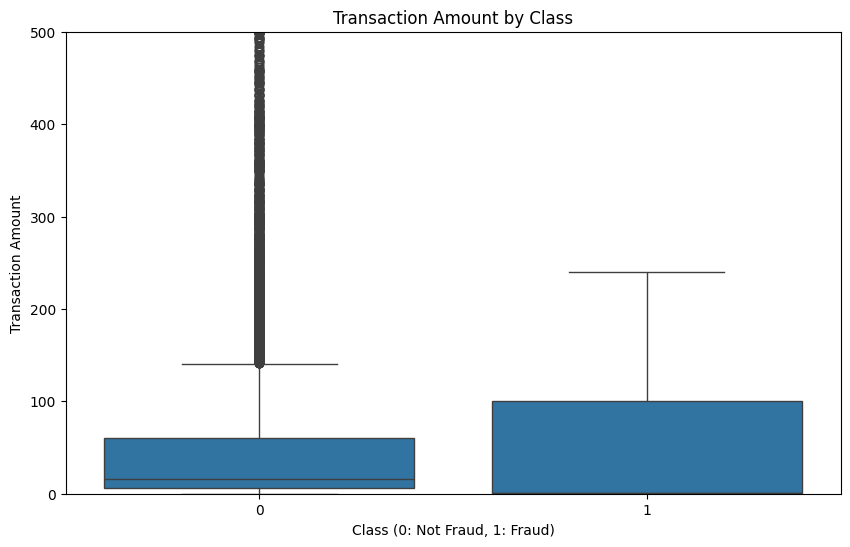

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.ylim(0, 500)
plt.show()


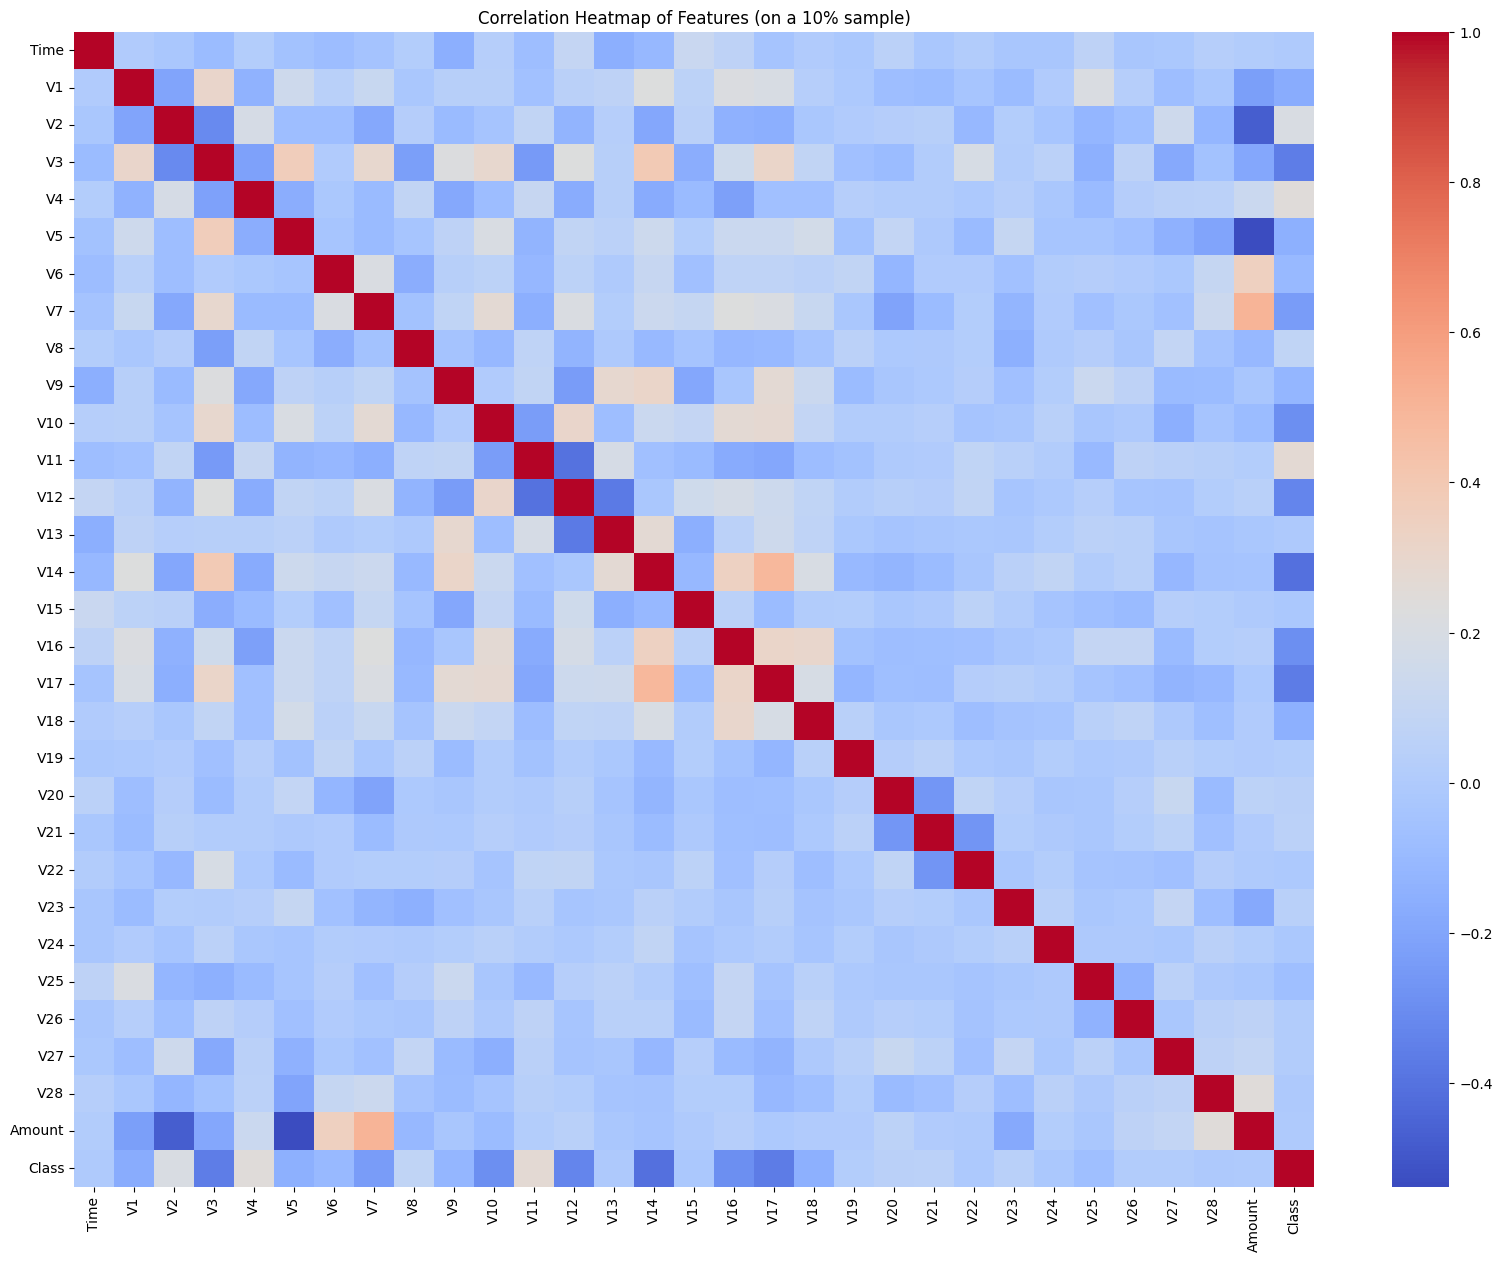

In [6]:
sample_df = df.sample(frac=0.1, random_state=42)
plt.figure(figsize=(20, 15))
sns.heatmap(sample_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Features (on a 10% sample)')
plt.show()


In [7]:
scaler = StandardScaler()
df['scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [8]:
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n--- Class distribution after SMOTE ---")
print(y_train_resampled.value_counts())



Applying SMOTE to the training data...

--- Class distribution after SMOTE ---
Class
0    14935
1    14935
Name: count, dtype: int64


In [9]:
print("\n--- Training Logistic Regression Model ---")
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_test)

print("\n--- Logistic Regression Results ---")
print(classification_report(y_test, y_pred_lr))



--- Training Logistic Regression Model ---

--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4979
           1       0.23      1.00      0.37        21

    accuracy                           0.99      5000
   macro avg       0.61      0.99      0.68      5000
weighted avg       1.00      0.99      0.99      5000



/Users/siddhu/Desktop/Programs/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print("\n--- Training Random Forest Model ---")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_clf.predict(X_test)

print("\n--- Random Forest Results ---")
print(classification_report(y_test, y_pred_rf))



--- Training Random Forest Model ---

--- Random Forest Results ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4979
           1       0.88      1.00      0.93        21

    accuracy                           1.00      5000
   macro avg       0.94      1.00      0.97      5000
weighted avg       1.00      1.00      1.00      5000



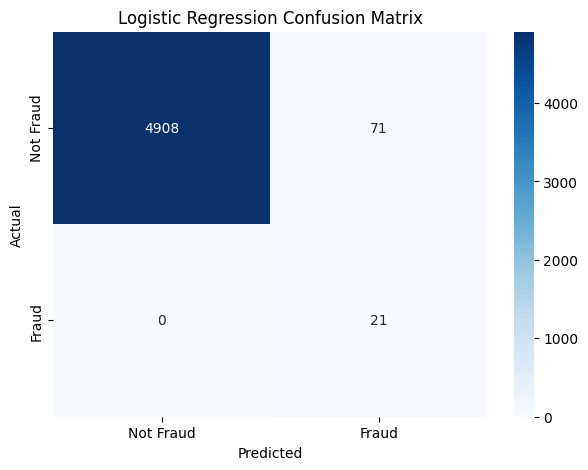

In [11]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


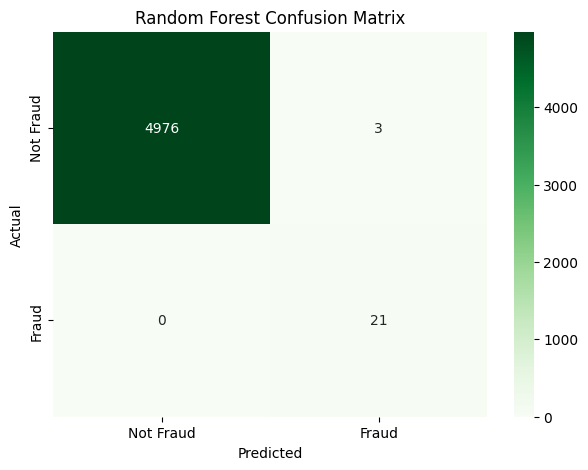

In [12]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


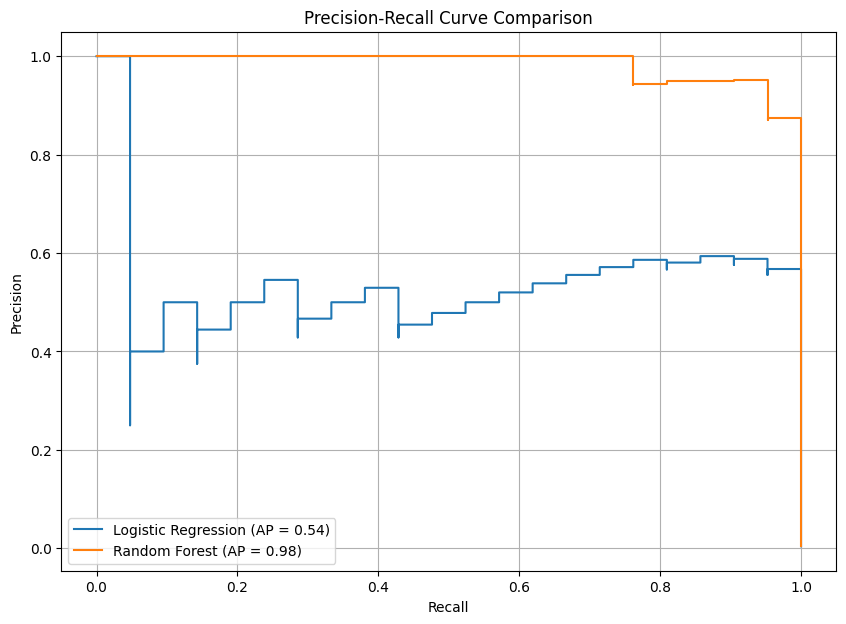

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

display_lr = PrecisionRecallDisplay.from_estimator(log_reg, X_test, y_test, name='Logistic Regression', ax=ax)
display_rf = PrecisionRecallDisplay.from_estimator(rf_clf, X_test, y_test, name='Random Forest', ax=ax)

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.grid(True)
plt.show()
